In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, roc_curve,
    precision_recall_curve, average_precision_score,
    classification_report
)
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings('ignore')

In [ ]:
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
churn_data.duplicated().sum()

np.int64(0)

In [ ]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


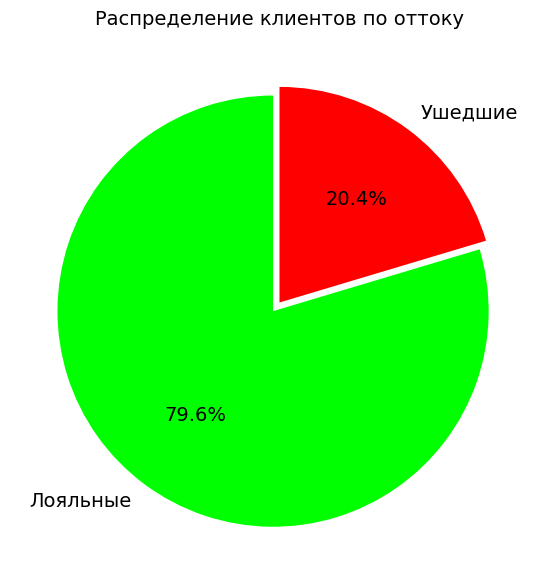

In [ ]:
grouped_by_exit = churn_data['Exited'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(grouped_by_exit, labels=['Лояльные', 'Ушедшие'], colors=['lime', 'red'], autopct='%1.1f%%',
        startangle=90, explode=[0.05, 0], textprops={'fontsize': 14})
plt.title('Распределение клиентов по оттоку', fontsize=14)
plt.show()

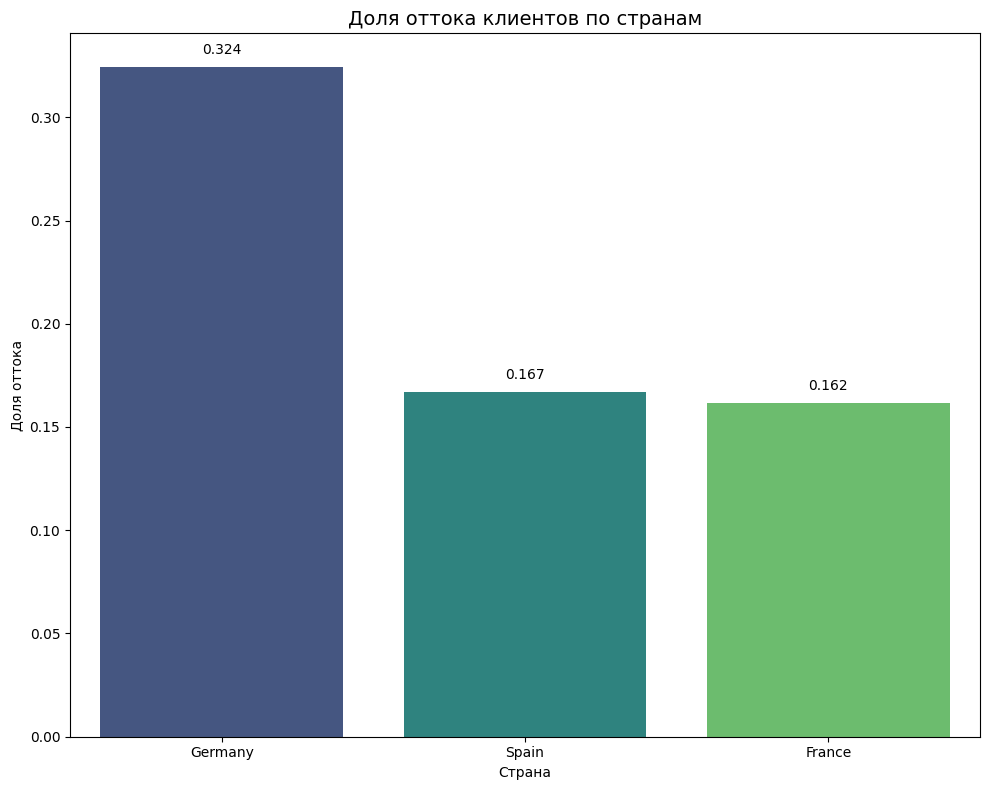

In [ ]:
plt.figure(figsize=(10, 8))
country_churn = churn_data.groupby('Geography')['Exited'].mean().sort_values(ascending=False)
sns.barplot(x=country_churn.index, y=country_churn.values, palette='viridis')
plt.title('Доля оттока клиентов по странам', fontsize=14)
plt.ylabel('Доля оттока')
plt.xlabel('Страна')
for i, v in enumerate(country_churn.values):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [ ]:
german_data = churn_data[churn_data['Geography'] == 'Germany'].copy()

data = german_data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1)

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male=1, Female=0

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,0,29,4,115046.74,4,1,0,119346.88,1
15,616,1,45,3,143129.41,2,0,1,64327.26,0
16,653,1,58,1,132602.88,1,1,0,5097.67,1
26,756,1,36,2,136815.64,1,1,1,170041.95,0
28,574,0,43,3,141349.43,1,1,1,100187.43,0


In [ ]:
X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='saga',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='saga')

In [ ]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
log_loss = log_loss(y_test, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print(f"Логарифмическая функция потерь: {log_loss:.4f}")

Accuracy: 0.6707
Precision: 0.4936
Recall: 0.6352
F1: 0.5556
ROC-AUC: 0.7198
PR-AUC: 0.5330
Логарифмическая функция потерь: 0.6139


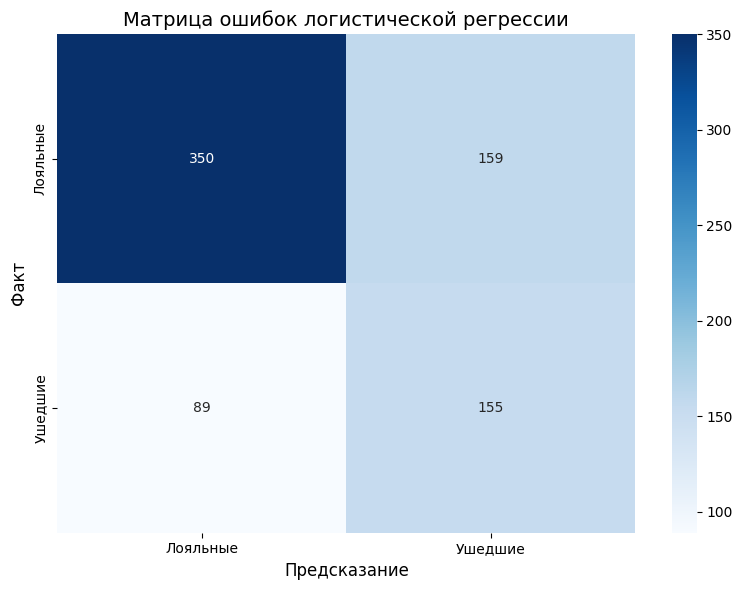

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Лояльные', 'Ушедшие'],
            yticklabels=['Лояльные', 'Ушедшие'])
plt.title("Матрица ошибок логистической регрессии", fontsize=14)
plt.xlabel('Предсказание', fontsize=12)
plt.ylabel('Факт', fontsize=12)
plt.tight_layout()
plt.show()

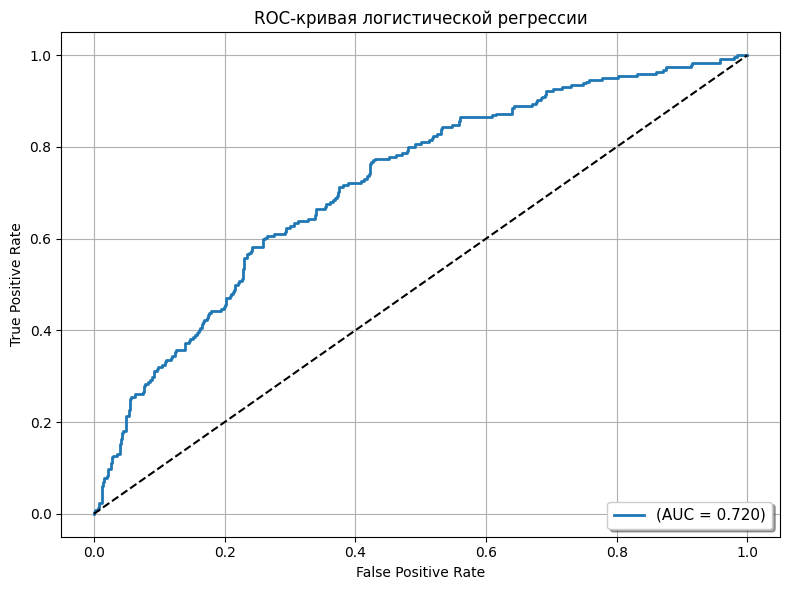

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'(AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC-кривая логистической регрессии")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)
plt.grid(True)
plt.tight_layout()
plt.show()

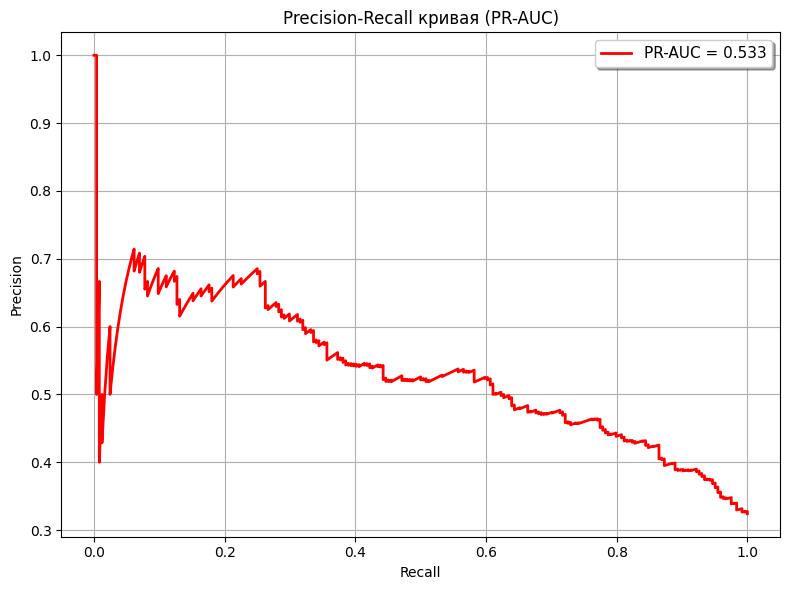

In [ ]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label=f'PR-AUC = {pr_auc:.3f}', linewidth=2, color='red')
plt.title("Precision-Recall кривая (PR-AUC)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='upper right', fontsize=11, frameon=True, shadow=True)
plt.grid(True)
plt.tight_layout()
plt.show()


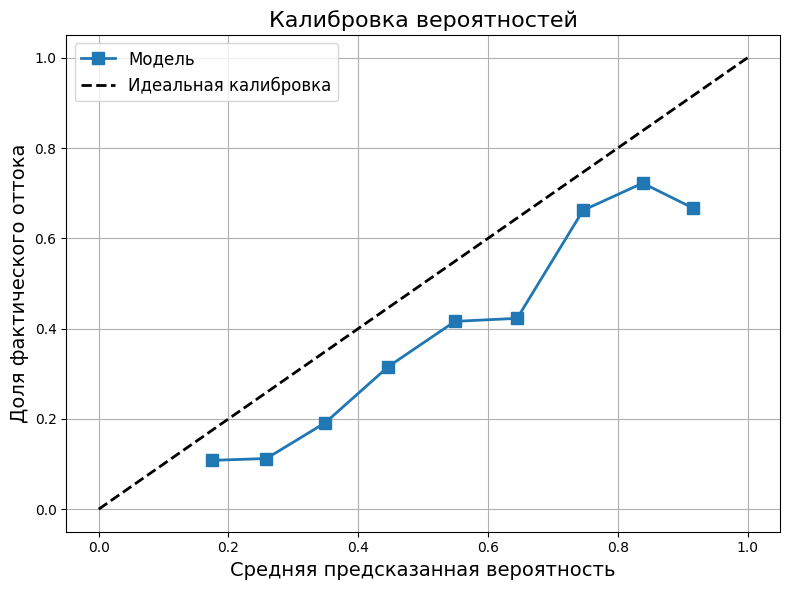

In [ ]:
plt.figure(figsize=(8, 6))
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
plt.plot(prob_pred, prob_true, 's-', label='Модель',
         linewidth=2, markersize=8)
plt.plot([0, 1], [0, 1], 'k--', label='Идеальная калибровка',
         linewidth=2)
plt.title('Калибровка вероятностей', fontsize=16)
plt.xlabel('Средняя предсказанная вероятность', fontsize=14)
plt.ylabel('Доля фактического оттока', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

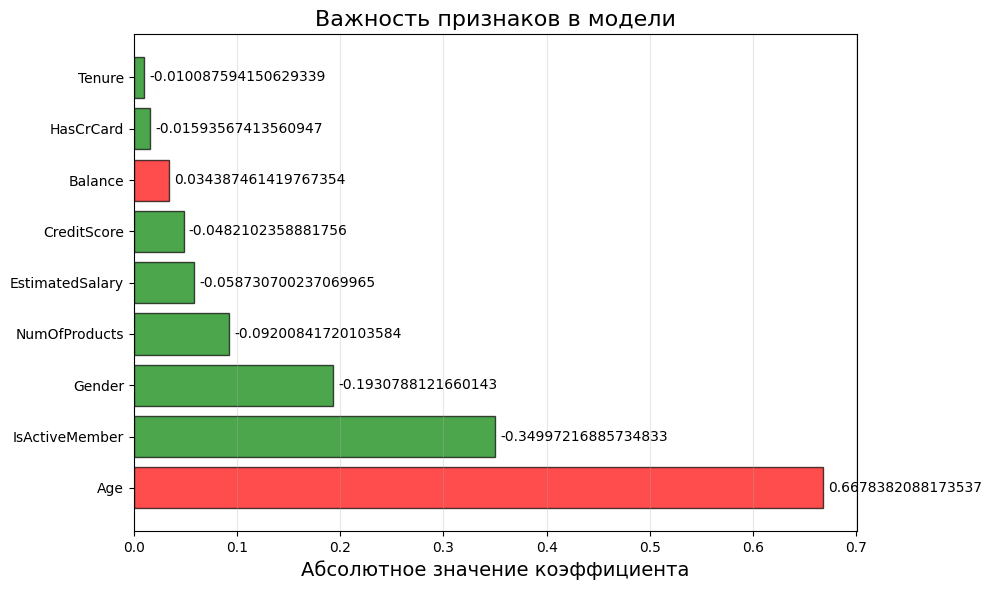

In [ ]:
feature_names = X.columns.tolist()
coefficients = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': model.coef_[0],
    'Абсолютное_значение': np.abs(model.coef_[0])
}).sort_values('Абсолютное_значение', ascending=False)

plt.figure(figsize=(10, 6))
colors = ['red' if coef > 0 else 'green' for coef in coefficients['Коэффициент']]
bars = plt.barh(coefficients['Признак'], coefficients['Абсолютное_значение'],
                color=colors, edgecolor='black', alpha=0.7)
plt.title('Важность признаков в модели', fontsize=16)
plt.xlabel('Абсолютное значение коэффициента', fontsize=14)
plt.grid(True, axis='x', alpha=0.3)

for bar, coef in zip(bars, coefficients['Коэффициент']):
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f'{coef}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Система скоринга клиентов

# Создает систему скоринга с заданным количеством групп
def create_scoring_system(probabilities, n_groups=5):
    percentiles = np.linspace(0, 100, n_groups + 1)[1:-1]
    thresholds = np.percentile(probabilities, percentiles)
    return np.concatenate([[0], thresholds, [1]])

# Присваивает группу риска на основе вероятности
def assign_scoring_group(probability, thresholds, n_groups=5):
    for i in range(len(thresholds) - 1):
        if thresholds[i] <= probability < thresholds[i+1]:
            return i + 1, f"Группа {i+1}"
    return n_groups, f"Группа {n_groups}"

In [ ]:
# Создание системы скоринга с 5 группами
scoring_thresholds = create_scoring_system(y_proba, n_groups=5)

# Применение скоринга
risk_groups = []
scores = []
score_points = []

for prob in y_proba:
    score, group = assign_scoring_group(prob, scoring_thresholds, n_groups=5)
    risk_groups.append(group)
    scores.append(score)
    score_points.append(int(prob * 100))  # Преобразование в шкалу 0-100

# Создание DataFrame с результатами скоринга
scoring_results = pd.DataFrame({
    'Фактический_отток': y_test.values,
    'Вероятность_оттока': y_proba,
    'Группа_риска': risk_groups,
    'Скор_балл': scores,
    'Скор_процент': score_points,
    'Предсказание': y_pred
})

# Анализ эффективности скоринговой системы

# Распределение по группам риска
risk_distribution = scoring_results['Группа_риска'].value_counts().sort_index()
print("1. Распределение клиентов по группам риска:")
for group in sorted(risk_distribution.index):
    count = risk_distribution[group]
    percentage = count / len(scoring_results) * 100
    print(f"{group}: {count:3d} клиентов {percentage:5.1f}%")

# Доля оттока по группам риска
print("2. Доля оттока по группам риска:")
churn_by_risk = scoring_results.groupby('Группа_риска')['Фактический_отток'].mean().sort_index()

for group in sorted(churn_by_risk.index):
    churn_rate = churn_by_risk[group]
    count = risk_distribution[group]
    print(f"{group}:{churn_rate*100:5.1f}% оттока ({int(count * churn_rate)} из {count} клиентов)")

print("3. Пороги вероятностей для групп риска:")
for i in range(len(scoring_thresholds) - 1):
    print(f"Группа {i+1}: {scoring_thresholds[i]:.3f} - {scoring_thresholds[i+1]:.3f}")



1. Распределение клиентов по группам риска:
Группа 1: 151 клиентов  20.1%
Группа 2: 150 клиентов  19.9%
Группа 3: 151 клиентов  20.1%
Группа 4: 150 клиентов  19.9%
Группа 5: 151 клиентов  20.1%
2. Доля оттока по группам риска:
Группа 1: 10.6% оттока (16 из 151 клиентов)
Группа 2: 20.7% оттока (31 из 150 клиентов)
Группа 3: 30.5% оттока (46 из 151 клиентов)
Группа 4: 42.7% оттока (64 из 150 клиентов)
Группа 5: 57.6% оттока (86 из 151 клиентов)
3. Пороги вероятностей для групп риска:
Группа 1: 0.000 - 0.303
Группа 2: 0.303 - 0.396
Группа 3: 0.396 - 0.512
Группа 4: 0.512 - 0.631
Группа 5: 0.631 - 1.000


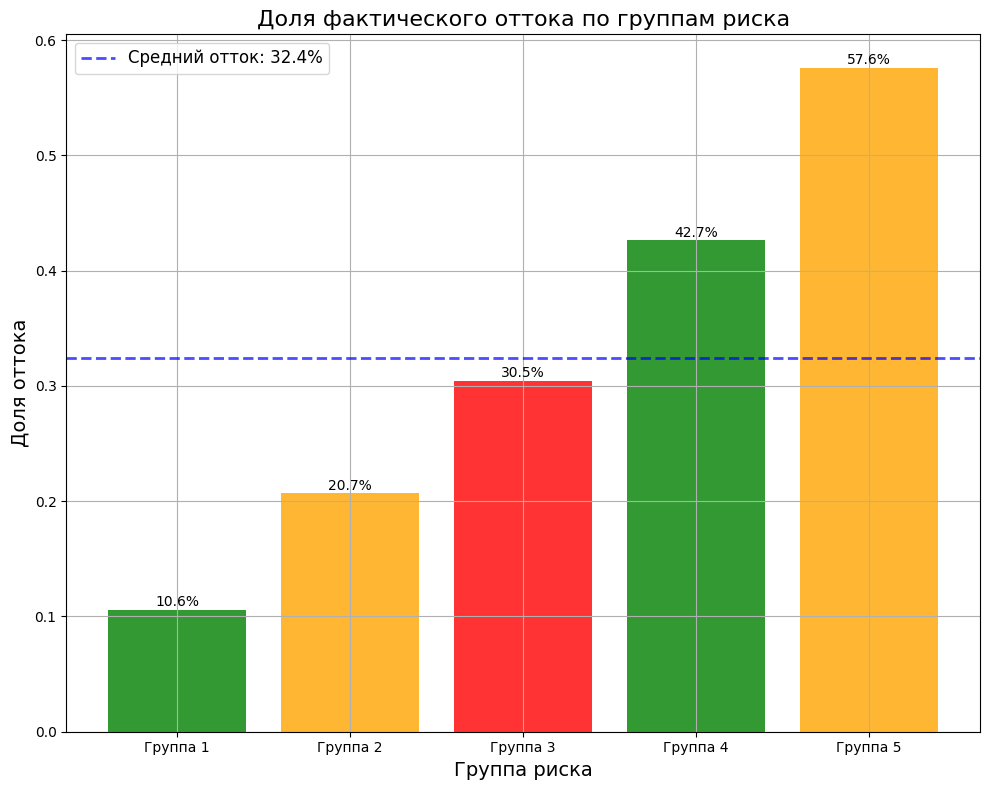

In [ ]:
# Доля оттока по группам риска
plt.figure(figsize=(10, 8))
groups = sorted(churn_by_risk.index)
churn_rates = [churn_by_risk[group] for group in groups]
colors = ['green', 'orange', 'red']

bars = plt.bar(groups, churn_rates, color=colors, alpha=0.8, linewidth=2)
plt.title('Доля фактического оттока по группам риска', fontsize=16)
plt.xlabel('Группа риска', fontsize=14)
plt.ylabel('Доля оттока', fontsize=14)
plt.xticks(rotation=0)

for bar, rate in zip(bars, churn_rates):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.0001,
             f'{rate*100:.1f}%', ha='center', va='bottom')

# Линия среднего оттока
mean_churn = y_test.mean()
plt.axhline(y=mean_churn, color='blue', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Средний отток: {mean_churn*100:.1f}%')
plt.legend(loc='upper left', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Функция для анализа конкретного клиента
def analyze_client(client_idx, group_name):

    # Получение данных клиента
    client_data = X_test.iloc[client_idx]
    client_scaled = scaler.transform(client_data.values.reshape(1, -1))

    # Прогнозирование
    client_prob = model.predict_proba(client_scaled)[0, 1]
    client_pred = model.predict(client_scaled)[0]
    client_actual = y_test.iloc[client_idx]

    # Анализ вклада признаков
    feature_contributions = model.coef_[0] * client_scaled[0]

    return {
        'idx': client_idx,
        'data': client_data,
        'probability': client_prob,
        'prediction': client_pred,
        'actual': client_actual,
        'contributions': feature_contributions
    }

In [ ]:
# Анализ клиентов из разных групп риска

# Словарь для хранения проанализированных клиентов
analyzed_clients = {}

# Анализ клиентов из каждой группы риска
group_name = f"Группа 2"
group_num = 2
# Находим всех клиентов в этой группе
clients_in_group = scoring_results[scoring_results['Группа_риска'] == group_name]

# Берем случайного клиента из группы
random_idx = np.random.choice(clients_in_group.index)

# Анализируем клиента
client_info = analyze_client(random_idx, group_name)
analyzed_clients[group_name] = client_info

print(f"{group_name.upper()} (риск {'низкий' if group_num <= 2 else 'средний' if group_num == 3 else 'высокий'})")

# Вывод характеристик клиента
print("ХАРАКТЕРИСТИКИ КЛИЕНТА:")

# Расшифровка категориальных признаков
gender_decoded = "Мужчина" if client_info['data']['Gender'] == 1 else "Женщина"
geography_decoded = "Испания" if client_info['data'].get('Geography_Spain', 0) == 1 else "Германия" if client_info['data'].get('Geography_Germany', 0) == 1 else "Франция"

print(f"  Пол: {gender_decoded}")
print(f"  Возраст: {int(client_info['data']['Age'])} лет")
print(f"  Кредитный рейтинг: {int(client_info['data']['CreditScore'])}")
print(f"  Баланс: {client_info['data']['Balance']:,.2f}")
print(f"  Страна: {geography_decoded}")
print(f"  Количество продуктов: {int(client_info['data']['NumOfProducts'])}")
print(f"  Стаж в банке: {int(client_info['data']['Tenure'])} лет")
print(f"  Активный клиент: {'Да' if client_info['data']['IsActiveMember'] == 1 else 'Нет'}")
print(f"  Есть кредитная карта: {'Да' if client_info['data']['HasCrCard'] == 1 else 'Нет'}")
print(f"  Оценочная зарплата: {client_info['data']['EstimatedSalary']:,.2f}")

# Вывод результатов прогнозирования
print()
print(f"РЕЗУЛЬТАТЫ ПРОГНОЗИРОВАНИЯ:")
print(f"  Вероятность оттока: {client_info['probability']:.3f} ({client_info['probability']*100:.1f}%)")
print(f"  Прогноз модели: {'Уйдет' if client_info['prediction'] == 1 else 'Останется'}")
print(f"  Фактический результат: {'Ушел' if client_info['actual'] == 1 else 'Остался'}")

# Проверка правильности прогноза
if client_info['prediction'] == client_info['actual']:
    print(f"  Результат: Модель правильно спрогнозировала")
else:
    print(f"  Результат: Модель ошиблась")

ГРУППА 2 (риск низкий)
ХАРАКТЕРИСТИКИ КЛИЕНТА:
  Пол: Женщина
  Возраст: 36 лет
  Кредитный рейтинг: 637
  Баланс: 145,750.45
  Страна: Франция
  Количество продуктов: 2
  Стаж в банке: 10 лет
  Активный клиент: Да
  Есть кредитная карта: Да
  Оценочная зарплата: 96,660.76

РЕЗУЛЬТАТЫ ПРОГНОЗИРОВАНИЯ:
  Вероятность оттока: 0.362 (36.2%)
  Прогноз модели: Останется
  Фактический результат: Остался
  Результат: Модель правильно спрогнозировала
